In [99]:
from google.colab import drive #Import Data dari google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd #import Library
import numpy as np
import matplotlib.pyplot as plt
ds = pd.read_csv('/content/drive/MyDrive/skripsi/dataset/rainfall.csv' , header=0 , names=['tanggal', 'dewpoint', 'temperature', 'precipitation']) #membaca DataSet
#ds.columns = ['tanggal', 'dewpoint', 'temperature', 'precipitation']
ds.info()
ds.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tanggal        129 non-null    object
 1   dewpoint       129 non-null    object
 2   temperature    129 non-null    object
 3   precipitation  129 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.2+ KB


,tanggal,dewpoint,temperature,precipitation
0,Jan 1 2017;297,691;303,931;0,1
1,Jan 2 2017;297,72;303,498;0,12
2,Jan 3 2017;297,736;302,315;0,2
3,Jan 4 2017;297,772;302,133;0,16
4,Jan 5 2017;297,78;302,281;0,14


In [101]:
xt = ds.reset_index() ['precipitation']
print(xt)
print(len(xt))
print(xt.shape)


0       1
1      12
2       2
3      16
4      14
       ..
124     7
125     6
126     7
127     4
128     7
Name: precipitation, Length: 129, dtype: int64
129
(129,)


In [102]:
print(np.array(xt).reshape(-1,1))

# Membuat array numpy dari list
#xt = [1, 2, 3, 4, 5]

# Menampilkan array numpy dengan reshape
#print(np.array(xt).reshape(-1,1))


[[ 1]
 [12]
 [ 2]
 [16]
 [14]
 [ 2]
 [ 3]
 [ 3]
 [18]
 [12]
 [ 5]
 [ 2]
 [ 4]
 [21]
 [ 1]
 [ 8]
 [ 6]
 [ 6]
 [12]
 [ 7]
 [12]
 [18]
 [11]
 [15]
 [12]
 [ 2]
 [ 7]
 [ 6]
 [12]
 [ 2]
 [ 1]
 [16]
 [ 5]
 [ 6]
 [14]
 [ 2]
 [ 5]
 [ 6]
 [ 7]
 [15]
 [18]
 [15]
 [ 4]
 [32]
 [15]
 [15]
 [ 4]
 [ 9]
 [ 4]
 [11]
 [ 6]
 [11]
 [ 7]
 [ 2]
 [ 7]
 [18]
 [ 4]
 [31]
 [ 2]
 [21]
 [17]
 [ 8]
 [ 7]
 [ 3]
 [18]
 [13]
 [ 1]
 [ 3]
 [ 2]
 [ 8]
 [ 6]
 [ 3]
 [ 4]
 [ 2]
 [ 2]
 [ 3]
 [17]
 [ 9]
 [11]
 [11]
 [ 1]
 [ 1]
 [ 3]
 [ 6]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 6]
 [ 7]
 [ 8]
 [13]
 [ 3]
 [ 1]
 [ 1]
 [ 8]
 [ 5]
 [ 8]
 [ 5]
 [16]
 [ 2]
 [ 8]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 8]
 [ 7]
 [18]
 [12]
 [13]
 [ 9]
 [ 6]
 [ 5]
 [ 1]
 [11]
 [ 6]
 [ 2]
 [ 6]
 [ 1]
 [ 6]
 [ 6]
 [ 8]
 [ 7]
 [ 6]
 [ 7]
 [ 4]
 [ 7]]


In [103]:
ds = np.array(xt).reshape(-1,1)
print(ds.shape)

(129, 1)


In [104]:
train_data,test_data

(array([[ 1],
        [12],
        [ 2],
        [16],
        [14],
        [ 2],
        [ 3],
        [ 3],
        [18],
        [12],
        [ 5],
        [ 2],
        [ 4],
        [21],
        [ 1],
        [ 8],
        [ 6],
        [ 6],
        [12],
        [ 7],
        [12],
        [18],
        [11],
        [15],
        [12],
        [ 2],
        [ 7],
        [ 6],
        [12],
        [ 2],
        [ 1],
        [16],
        [ 5],
        [ 6],
        [14],
        [ 2],
        [ 5],
        [ 6],
        [ 7],
        [15],
        [18],
        [15],
        [ 4],
        [32],
        [15],
        [15],
        [ 4],
        [ 9],
        [ 4],
        [11],
        [ 6],
        [11],
        [ 7],
        [ 2],
        [ 7],
        [18],
        [ 4],
        [31],
        [ 2],
        [21],
        [17],
        [ 8],
        [ 7],
        [ 3],
        [18],
        [13],
        [ 1],
        [ 3],
        [ 2],
        [ 8],
        [ 6],
      

In [98]:
print (train_data.shape)
print (test_data.shape)

(103, 1)
(26, 1)


In [106]:
training_size,test_size

(103, 26)

In [114]:
import numpy
# convert an array of values into a dataset matrix
# mengonversi array nilai menjadi matriks kumpulan data
def create_dataset(dataset, time_step=1):
  dataX , dataY = [], []
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step), 0] # i = 0, 0,1,2,3....... 99 100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [115]:
time_step=4
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [118]:
x_test, y_test

(array([[ 1,  1,  1,  3,  8],
        [ 1,  1,  3,  8,  7],
        [ 1,  3,  8,  7, 18],
        [ 3,  8,  7, 18, 12],
        [ 8,  7, 18, 12, 13],
        [ 7, 18, 12, 13,  9],
        [18, 12, 13,  9,  6],
        [12, 13,  9,  6,  5],
        [13,  9,  6,  5,  1],
        [ 9,  6,  5,  1, 11],
        [ 6,  5,  1, 11,  6],
        [ 5,  1, 11,  6,  2],
        [ 1, 11,  6,  2,  6],
        [11,  6,  2,  6,  1],
        [ 6,  2,  6,  1,  6],
        [ 2,  6,  1,  6,  6],
        [ 6,  1,  6,  6,  8],
        [ 1,  6,  6,  8,  7],
        [ 6,  6,  8,  7,  6],
        [ 6,  8,  7,  6,  7]]),
 array([ 7, 18, 12, 13,  9,  6,  5,  1, 11,  6,  2,  6,  1,  6,  6,  8,  7,
         6,  7,  4]))

In [117]:
time_step=5
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [119]:
x_test, y_test

(array([[ 1,  1,  1,  3,  8],
        [ 1,  1,  3,  8,  7],
        [ 1,  3,  8,  7, 18],
        [ 3,  8,  7, 18, 12],
        [ 8,  7, 18, 12, 13],
        [ 7, 18, 12, 13,  9],
        [18, 12, 13,  9,  6],
        [12, 13,  9,  6,  5],
        [13,  9,  6,  5,  1],
        [ 9,  6,  5,  1, 11],
        [ 6,  5,  1, 11,  6],
        [ 5,  1, 11,  6,  2],
        [ 1, 11,  6,  2,  6],
        [11,  6,  2,  6,  1],
        [ 6,  2,  6,  1,  6],
        [ 2,  6,  1,  6,  6],
        [ 6,  1,  6,  6,  8],
        [ 1,  6,  6,  8,  7],
        [ 6,  6,  8,  7,  6],
        [ 6,  8,  7,  6,  7]]),
 array([ 7, 18, 12, 13,  9,  6,  5,  1, 11,  6,  2,  6,  1,  6,  6,  8,  7,
         6,  7,  4]))

In [139]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#Import Modul yg digunakan/dibutuhkan

batch_size = 10 # Penentuan jumlah sample yang ditraining pada tiap epoch
num_epochs = 100 # Banyak iterasi pada saat training models

model=Sequential()
model.add(LSTM(50, activation= 'relu', return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50, activation= 'relu', return_sequences=True))
model.add(LSTM(50, activation= 'relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error',optimizer='adam')
#model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mean_absolute_error"])
history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))




Epoch 1/100
4/4 [==============================] - 4s 175ms/step - loss: 7.9080 - val_loss: 6.9271
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 7.7991 - val_loss: 6.7956
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 7.6084 - val_loss: 6.5371
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 7.1869 - val_loss: 6.0030
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 6.3561 - val_loss: 5.7111
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 5.9029 - val_loss: 5.6045
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 5.6727 - val_loss: 5.4688
Epoch 8/100
4/4 [==============================] - 0s 18ms/step - loss: 5.5902 - val_loss: 5.3839
Epoch 9/100
4/4 [==============================] - 0s 19ms/step - loss: 5.5523 - val_loss: 5.3009
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 5.5138 - val_loss: 5.2457
Epoch 11/100
4/4 [

In [140]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_49 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_50 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


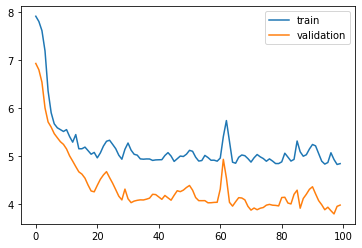

In [144]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

In [145]:
train_predict=model.predict(x_train)#Nilai Observasi
test_predict=model.predict(x_test)#Nilai Prediksi

from sklearn.metrics import  mean_absolute_error
mae_train=mean_squared_error(y_train, train_predict)
print(mae_train)

mae_test=mean_squared_error(y_test, test_predict)
print(mae_test)
mae=mean_absolute_error(y_test,test_predict)
print(mae)

1/1 [==============================] - 0s 25ms/step
46.98401530297254
27.968692090229162
3.984231835603714


In [159]:
xts=[[46.8,27.2,40.1,30.6,74.4]]
prediksi=model.predict(xts)
print(prediksi)

1/1 [==============================] - 0s 39ms/step
[[15.531256]]


In [158]:
xts2=[[16.8,6.2,13.1,15.6,1.4]]
prediksi=model.predict(xts2)
print(prediksi)

1/1 [==============================] - 0s 41ms/step
[[6.8026214]]


In [163]:
xts3=[[71.81,28.2,16.1,15.6,10.4]]
prediksi=model.predict(xts3)
print(prediksi)

1/1 [==============================] - 0s 44ms/step
[[5.805096]]


In [156]:
xts4=[[1.8,0.2,18.1,19.6,12.4]]
prediksi=model.predict(xts4)
print(prediksi)

1/1 [==============================] - 0s 34ms/step
[[3.966541]]


In [164]:
xts5=[[61.8,69.2,13.1,51.6,18.4]]
prediksi=model.predict(xts5)
print(prediksi)

1/1 [==============================] - 0s 93ms/step
[[12.108292]]


In [165]:
data=[[15,6,5,3,12]]
prediksi=model.predict(data)
print(prediksi)

1/1 [==============================] - 0s 31ms/step
[[6.065102]]
